# BREAST CANCER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
%matplotlib inline

In [2]:
# loading the breast cancer dataset from sklearn
cancer = load_breast_cancer()

In [3]:
list(cancer.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [4]:
cancer["data"].shape

(569, 30)

In [5]:
cancer['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##### Splitting the dataset

In [7]:
shuffle_index = np.random.permutation(569)

In [8]:
# Spliting dataset into 2, training and testing
cancer_data, cancer_target = cancer["data"][shuffle_index], cancer["target"][shuffle_index]
data_train, data_test, target_train, target_test = train_test_split(cancer_data, cancer_target, test_size=0.2, random_state=42)

In [9]:
data_test.shape

(114, 30)

In [10]:
# Spliting the training dataset into 2, training and validation
train_data, train_val, test_data, test_val = train_test_split(data_train, target_train, test_size=0.1, random_state=42)

### Training the model

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
train_data_scaled = scaler.fit_transform(train_data)

train_val_scaled = scaler.fit_transform(train_val)

###### Using Support Vector Classifier (SVC)

In [13]:
from sklearn.svm import SVC

svc = SVC(random_state=42, gamma=0.001, C=1)

In [14]:
svc_mod = svc.fit(train_data_scaled, test_data)
svc_mod

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
svc.score(train_data, test_data)

0.6405867970660146

In [16]:
import joblib
joblib.dump(svc_mod, "svc_bc_model.plk")

['svc_bc_model.plk']

In [17]:
cvs_svc = cross_val_score(svc, train_val_scaled, test_val, cv=3, scoring="accuracy")
cvs_svc.mean()

0.7388888888888889

In [18]:
from sklearn.model_selection import cross_val_predict

cvp_svc = cross_val_predict(svc, train_data_scaled, test_data, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_data, cvp_svc)

array([[130,  17],
       [  0, 262]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(test_data, cvp_svc)

0.9390681003584229

In [21]:
recall_score(test_data, cvp_svc)

1.0

###### Using Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', multi_class="auto")

In [23]:
log_reg_mod = log_reg.fit(train_data_scaled, test_data)
log_reg_mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
log_reg.score(train_data, test_data)

0.3594132029339853

In [25]:
joblib.dump(log_reg_mod, "log_reg_model.plk")

['log_reg_model.plk']

In [26]:
cvs_log_reg = cross_val_score(log_reg, train_val_scaled, test_val, cv=3, scoring="accuracy")
cvs_log_reg.mean()

0.9583333333333334

In [27]:
cvp_log_reg = cross_val_predict(log_reg, train_data_scaled, test_data, cv=3)

In [28]:
confusion_matrix(test_data, cvp_log_reg)

array([[142,   5],
       [  2, 260]], dtype=int64)

In [29]:
precision_score(test_data, cvp_log_reg)

0.9811320754716981

In [30]:
recall_score(test_data, cvp_log_reg)

0.9923664122137404

###### Using Stochastic Gradient Descent (SGD) classifier

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [32]:
sgd_mod = sgd_clf.fit(train_data, test_data)
sgd_mod

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
sgd_clf.score(train_data, test_data)

0.9193154034229829

In [34]:
joblib.dump(sgd_mod, "sgd_model.plk")

['sgd_model.plk']

In [35]:
cvs_sgd_clf = cross_val_score(sgd_clf, train_val_scaled, test_val, cv=3, scoring="accuracy")
cvs_sgd_clf.mean()

0.9791666666666666

In [36]:
cvp_sgd_clf = cross_val_predict(sgd_clf, train_data_scaled, test_data, cv=3)

In [37]:
confusion_matrix(test_data, cvp_sgd_clf)

array([[143,   4],
       [  4, 258]], dtype=int64)

In [38]:
precision_score(test_data, cvp_sgd_clf)

0.9847328244274809

In [39]:
recall_score(test_data, cvp_sgd_clf)

0.9847328244274809

###### Fitting model to the validation dataset

In [40]:
# Fitting model to new instances
val_model = log_reg

In [41]:
val_predictions = val_model.predict(train_val_scaled)

In [42]:
val_score = cross_val_score(val_model, train_val_scaled, test_val, cv=3, scoring="accuracy")
val_score.mean()

0.9583333333333334

In [43]:
confusion_matrix(test_val, val_predictions)

array([[17,  1],
       [ 0, 28]], dtype=int64)

In [44]:
precision_score(test_val, val_predictions)

0.9655172413793104

In [45]:
recall_score(test_val, val_predictions)

1.0

In [46]:
Val_predicted_status = pd.DataFrame(val_predictions, columns=["Status"])
Val_predicted_status.head()

,Status
0,1
1,1
2,0
3,1
4,0


In [47]:
from sklearn.metrics import precision_recall_curve

test_val_proba = cross_val_predict(log_reg, train_val_scaled, test_val, cv=3, method="predict_proba")

In [48]:
test_scores = test_val_proba[:, 1]
test_scores

array([9.95190204e-01, 8.62367577e-01, 4.05303914e-01, 9.74655644e-01,
       5.13717165e-01, 8.37217774e-01, 2.07882429e-04, 2.70231010e-02,
       7.76932430e-01, 9.79977640e-01, 8.67078068e-01, 9.93658129e-01,
       6.38806792e-01, 5.07816193e-02, 9.33590340e-01, 9.59440731e-01,
       9.98807776e-01, 1.53673047e-02, 1.02712888e-04, 9.78818773e-01,
       9.81065547e-01, 6.21932330e-05, 6.66812751e-01, 9.73258531e-01,
       9.31890693e-01, 4.68280797e-01, 3.41056677e-02, 9.96912153e-01,
       8.18243230e-01, 9.93941867e-01, 1.20989759e-03, 7.48594221e-01,
       9.96890342e-01, 9.65488863e-08, 4.46587716e-02, 1.20914946e-02,
       5.30432195e-02, 9.82769079e-01, 9.30136198e-01, 9.50513421e-01,
       2.81097374e-05, 9.28711423e-01, 7.58736203e-01, 9.68699599e-01,
       6.15117370e-04, 7.72110649e-01])

In [49]:
precisions, recalls, thresholds = precision_recall_curve(test_val, test_scores)

In [50]:
def plot_precision_recall_to_thresholds(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Thresholds")
    plt.legend()
    plt.grid()

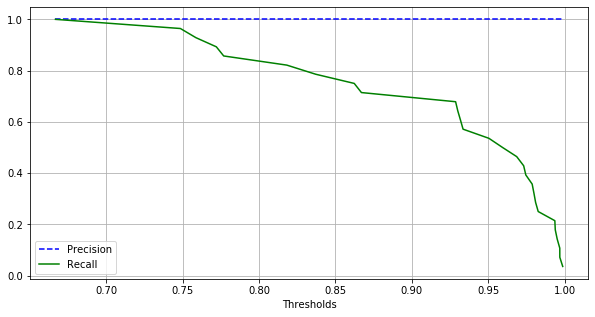

In [51]:
plot_precision_recall_to_thresholds(precisions, recalls, thresholds)

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_val, test_scores)

In [53]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (RECALL)")
    plt.plot([0,1], [0,1], 'k--') # Dashed diagonal
    plt.grid()

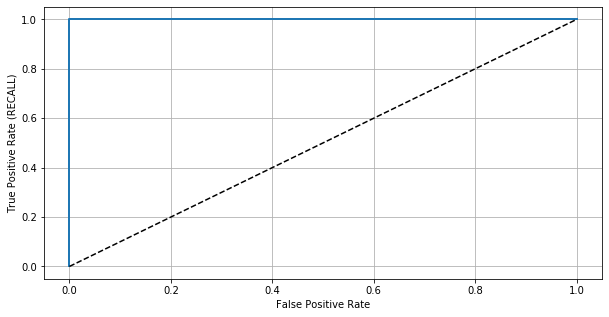

In [54]:
plot_roc_curve(fpr, tpr)

In [55]:
from sklearn.metrics import roc_auc_score

ra_score = roc_auc_score(test_val, test_scores)

In [56]:
ra_score

1.0

In [57]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cvs = cross_val_score(svc, train_val_scaled, test_val, cv=3, scoring="accuracy")

In [58]:
# Final fittiong. Fitting the test data using 

data_test_scaled = scaler.transform(data_test)

In [59]:
model = log_reg

In [60]:
predictions = model.predict(data_test_scaled)

In [61]:
score = cross_val_score(model, data_test_scaled, target_test, cv=3, scoring="accuracy")
score.mean()

0.9392712550607287

In [62]:
Predicted_status = pd.DataFrame(predictions, columns=["Status"])
Predicted_status.head()

,Status
0,1
1,0
2,1
3,1
4,1


In [63]:
Predicted_status.to_csv("Breast_Cancer_Predicted_Status.csv")